In [1]:
from sklearn.preprocessing import MinMaxScaler
data=[[-1,2],[-0.5,6],[0,10],[1,18]]
import pandas as pd
pd.DataFrame(data)
#实现归一化
scaler=MinMaxScaler() #实例化
scaler=scaler.fit(data)#fit,在这里本质是生成min(x)和max(x)
result=scaler.transform(data)#通过接口导出结果

In [2]:
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [3]:
#因为是两列，数据归一化操作是在每列进行运算的
#比如第一列：x1=-1-(-1)/1-(-1)=0,x2=-0.5-(-1)/1-(-1)=0.25
#第二例：x1=2-2/18-2=0
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
result_=scaler.fit_transform(data)#训练和导出结果一步达成
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
scaler.inverse_transform(result)#将归一化后的结果逆转

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [6]:
#使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
data=[[-1,2],[-0.5,6],[0,10],[1,18]]
scaler=MinMaxScaler(feature_range=[5,10])
result=scaler.fit_transform(data)
result
#当X中特征数量非常多的时候，fit会报错，因为数据量太大了
#此时使用partial_fit作为训练接口
#scaler=scaler.partial_fit(data)

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [7]:
#数据标准化：x*=x-u/d(u是均值，d方差)
#服从标准正态分布

In [8]:
from sklearn.preprocessing import StandardScaler
data=[[-1,2],[-0.5,6],[0,10],[1,18]]
scaler=StandardScaler()#实例化
scaler.fit(data)#fit,本质是生成均值和方差

StandardScaler()

In [9]:
scaler.mean_#查看均值的属性mean_

array([-0.125,  9.   ])

In [10]:
scaler.var_#查看方差的属性var_

array([ 0.546875, 35.      ])

In [11]:
x_std=scaler.transform(data)#通过接口导出结果
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [12]:
x_std.mean()#导出的结果是一个数组，用mean()查看均值

0.0

In [13]:
x_std.std()#用std()查看标准差

1.0

In [14]:
scaler.fit_transform(data)#使用fit_transform(data)一步达成结果

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [18]:
scaler.inverse_transform(x_std)#使用inverse_transform逆转标准化

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [19]:
import pandas as pd
data=pd.read_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\03数据预处理和特征工程\Narrativedata.csv",index_col=0)
#index_col意思是把第0列作为索引
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [20]:
data.info()#只有Dataframe有info这个属性
#发现年龄和舱门有缺失值

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [21]:
data.info()
#填补年龄

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  891 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.8+ KB


In [22]:
Age=data.loc[:,"Age"].values.reshape(-1,1)#sklearn中的特征矩阵必须是二维

In [23]:
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [24]:
from sklearn.impute import SimpleImputer
imp_mean=SimpleImputer()#实例化，默认均值填补
imp_median=SimpleImputer(strategy="median")#用中位数填补
imp_0=SimpleImputer(strategy="constant",fill_value=0)#用0填补

In [25]:
imp_mean=imp_mean.fit_transform(Age)#fit_transform一步完成调取结果
imp_median=imp_median.fit_transform(Age)
imp_0=imp_0.fit_transform(Age)

In [26]:
imp_mean[:20]

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765]])

In [27]:
imp_median[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [28.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [28.],
       [31.],
       [28.]])

In [28]:
imp_0[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [ 0.],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [ 0.],
       [31.],
       [ 0.]])

In [70]:
#在这里我们使用中位数填补Age
data.loc[:,"Age"]=imp_median
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 67.1+ KB


In [71]:
#使用众数填补Embarked,众数可以填充文字型数据
Embarked=data.loc[:,"Embarked"].values.reshape(-1,1)
imp_mode=SimpleImputer(strategy="most_frequent")
data.loc[:,"Embarked"]=imp_mode.fit_transform(Embarked)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       891 non-null    float64
 1   Sex       891 non-null    object 
 2   Embarked  891 non-null    object 
 3   Survived  891 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 67.1+ KB


In [31]:
#同样，可以用pandas和numpy进行填充，并且会更简单
import pandas as pd
data_=pd.read_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\03数据预处理和特征工程\Narrativedata.csv",index_col=0)
data_.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No


In [32]:
data_.loc[:,"Age"]=data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
#.fillna在Dataframe里面直接进行填补 
data_.loc[:,"Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [33]:
data_.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace=True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认为False
data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    object 
dtypes: float64(1), object(3)
memory usage: 34.7+ KB


In [ ]:
#处理分类型特征：编码与哑变量

In [34]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder#标签专用
data=pd.read_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\03数据预处理和特征工程\Narrativedata.csv",index_col=0)
#index_col意思是把第0列作为索引
y=data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所有允许一维（一般都习惯放到最后一列，这里是survived  ）
le=LabelEncoder()#实例化
le=le.fit(y)#导入数据
label=le.transform(y)#transfrom接口调取结果
label#为什么label里面是0,1,2，不是有yes，no两种么
#答：通过classes_发现想，有三类

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [35]:
le.classes_#属性.classes_查看标签纸究竟有多少类别

array(['No', 'Unknown', 'Yes'], dtype=object)

In [36]:
le.fit_transform(y)

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1,
       0, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [37]:
le.inverse_transform(label)

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Unknown', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No',
       'Yes', 'Yes', 'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'N

In [38]:
data.iloc[:,-1]=label#让标签等于我们运行出来的结果

In [39]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [41]:
#最简单的写法：
from sklearn.preprocessing import LabelEncoder
data.iloc[:,-1]=LabelEncoder().fit_transform(data.iloc[:,-1])

In [40]:
data.iloc[:,-1]

0      0
1      2
2      2
3      2
4      0
      ..
886    0
887    2
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [42]:
#preprocessing.OrdinalEncoder 特征专用，能够将分类特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder
#接口categories_对应LabelEncoder的接口classes_,一模一样的功能
data_=data.copy()
#data_.head

data_.loc[:,"Age"]=data_.loc[:,"Age"].fillna(data_.loc[:,"Age"].median())
#.fillna在Dataframe里面直接进行填补 
data_.loc[:,"Age"]
data_.dropna(axis=0,inplace=True)
#.dropna(axis=0)删除所有有缺失值的行，.dropna(axis=1)删除所有有缺失值的列
#参数inplace=True表示在原数据集上进行修改，为False表示生成一个复制对象，不修改原数据，默认为False
data_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       889 non-null    float64
 1   Sex       889 non-null    object 
 2   Embarked  889 non-null    object 
 3   Survived  889 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 34.7+ KB


In [44]:
#需要保证没有缺失值，如果有缺失值，则会报错
OrdinalEncoder().fit(data_.iloc[:,1:-1]).categories_#data_.iloc[:,1:-1]所有的行从索引为1的列取到最后1列（不包括最后1列）

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [45]:
data_.iloc[:,1:-1]=OrdinalEncoder().fit_transform(data_.iloc[:,1:-1])

data_.head()#将sex和embarked都转成数值型数据

,Age,Sex,Embarked,Survived
0,22.0,1.0,2.0,0
1,38.0,0.0,0.0,2
2,26.0,0.0,2.0,2
3,35.0,0.0,2.0,2
4,35.0,1.0,2.0,0


In [47]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,2
2,26.0,female,S,2
3,35.0,female,S,2
4,35.0,male,S,0


In [48]:
#使用独热编码，创建哑变量

In [74]:
from sklearn.preprocessing import OneHotEncoder
X=data.iloc[:,1:-1]
enc=OneHotEncoder(categories='auto').fit(X)
result=enc.transform(X).toarray()#转化为数组
# enc.transform(X)
result#因为是sex和embarked两个特征，sex有两类，embarked有三类，所以最后结果是5列

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [76]:
#也可以一步到位
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [77]:
#依然可以还原
pd.DataFrame(enc.inverse_transform(result))

,0,1
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [78]:
enc.get_feature_names()#x后面的数字相同代表同一类，方便观察不同列的0,1代表那个类别

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [80]:
#axis=1，表示跨行进行合并，也就是将量表左右相连，如果是axis=0，就是将量表上下相连
newdata=pd.concat([data,pd.DataFrame(result)],axis=1)
newdata.head()

,Age,Sex,Embarked,Survived,0,1,2,3,4
0,22.0,male,S,0,0.0,1.0,0.0,0.0,1.0
1,38.0,female,C,2,1.0,0.0,1.0,0.0,0.0
2,26.0,female,S,2,1.0,0.0,0.0,0.0,1.0
3,35.0,female,S,2,1.0,0.0,0.0,0.0,1.0
4,35.0,male,S,0,0.0,1.0,0.0,0.0,1.0


In [81]:
newdata.drop(["Sex","Embarked"],axis=1,inplace=True)
newdata.columns=["Age","Survived","Female","Male","Embarked_c","Embarked_q","Embarked_s"]
newdata.head()

,Age,Survived,Female,Male,Embarked_c,Embarked_q,Embarked_s
0,22.0,0,0.0,1.0,0.0,0.0,1.0
1,38.0,2,1.0,0.0,1.0,0.0,0.0
2,26.0,2,1.0,0.0,0.0,0.0,1.0
3,35.0,2,1.0,0.0,0.0,0.0,1.0
4,35.0,0,0.0,1.0,0.0,0.0,1.0


In [ ]:
#处理连续型特征：二值化与分段

In [82]:
#二值化：
#例：将Age按某一年龄划分0,1
data_2=data.copy()

In [83]:
from sklearn.preprocessing import Binarizer

In [84]:
X=data_2.iloc[:,0].values.reshape(-1,1)#Binarizer类为特征专用，所以不能使用一维数组

In [88]:
transformer=Binarizer(threshold=30).fit_transform(X)#30以上的划为1，以下的划为0
#transformer
data_2.iloc[:,0]=transformer

In [91]:
#分段：
from sklearn.preprocessing import KBinsDiscretizer
X=data.iloc[:,0].values.reshape(-1,1)

In [92]:
est=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],

In [93]:
#查看转换后分的箱：变成了一列中的三箱
set(est.fit_transform(X).ravel())#查看刚刚得到的结果是不是只有012三箱

{0.0, 1.0, 2.0}

In [94]:
est=KBinsDiscretizer(n_bins=3,encode='onehot',strategy='uniform')
#查看转换后的分箱：变成了哑变量
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [95]:
#特征选择feature_selection

In [96]:
#导入数据，使用digit recognizor数据
import pandas as pd
data=pd.read_csv(r"C:\Users\hp\Desktop\python\机器学习菜菜\sklearnjqxx_jb51\【机器学习】菜菜的sklearn课堂(1-12全课)\03数据预处理和特征工程\digit recognizor.csv")

In [99]:
X=data.iloc[:,1:]#取出从索引为1的列一直到最后
y=data.iloc[:,0]#取出数据中的第0列

In [100]:
X.shape

(42000, 784)

In [101]:
#方差过滤
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold()#实例化，不填参数默认方差为0
X_var0=selector.fit_transform(X)#获取删除不合格特征之后的新特征矩阵,表示删除方差为0的特征
#也可以直接写成x=VairanceThreshold().fit_transform(X)
X_var0.shape

(42000, 708)

In [110]:
#希望留下一半的特征，可以设定一个让特征总数减半的方差阈值，只要找到特征方差的中位数，将这个中位数作为参数threshold的值输入就好了
import numpy as np
X_fsvar=VarianceThreshold(np.median(X.var().values)).fit_transform(X)
X.var().values#得到X的方差

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.22760590e-01, 2.64689018e+00, 1.11085714e+00, 1.92857143e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.09523810e-03, 5.41186213e-02, 1.28065733e+00, 5.33793150e+00,
       9.74592647e+00, 1.06219147e+01, 2.49289953e+01, 3.37671294e+01,
       3.59425660e+01, 3.49309575e+01, 3.62943342e+01, 3.27911079e+01,
       3.04237672e+01, 2.95547817e+01, 2.00568398e+01, 1.19545659e+01,
       8.60419724e+00, 2.55465685e+00, 1.60530842e+00, 9.29377602e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [106]:
np.median(X.var().values)#X方差中的中位数

1352.286703180131

In [111]:
X_fsvar=VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [112]:
X_fsvar.shape

(42000, 392)

In [134]:
#卡方过滤
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#假设在这里我知道我需要300个特征
X_fschi=SelectKBest(chi2,k=390).fit_transform(X_fsvar,y)

In [135]:
X_fschi.shape

(42000, 390)

In [128]:
cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()

0.9397380952380953

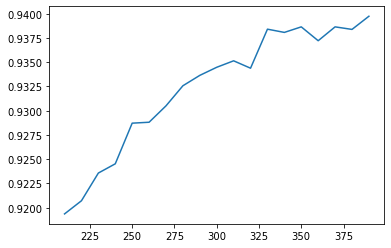

In [129]:
#如何选取合适的K值？
#使用学习曲线选择一个最优的K

import matplotlib.pyplot as plt
score=[]
for i in range(390,200,-10):
    X_fschi=SelectKBest(chi2,k=i).fit_transform(X_fschi,y)
    once=cross_val_score(RFC(n_estimators=10,random_state=0),X_fschi,y,cv=5).mean()
    score.append(once)
plt.plot(range(390,200,-10),score)
plt.show()
#发现K越大越好

In [138]:
chivalue,pvalues_chi=chi2(X_fschi,y)
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  902883.1255264 , 1237265.16042373,
       1503477.73699155, 1625807.41495542, 1630206.90922916,
       1630597.02883804, 1633456.72909664, 1610816.75571229,
       1483382.49543886, 1256290.1574794 ,  951236.1617682 ,
        693192.66191748,  532386.96220361,  504617.38933715,
        575090.36046243,  501025.03733245,  802341.10683194,
       1078344.8724406 , 1226540.98318702, 1269945.07968831,
       1221758.57688808, 1146535.17810241, 1080657.20185303,
       1079065.30979135, 1092222.70610032, 1064908.45385716,
       1023327.00231067,  974163.15420165,  918857.12860617,
        861439.52030749,

In [140]:
pvalues_chi
#得到的这个P值都小于0.05，即所有的特征都和标签相关

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [142]:
#K取多少，我们想要消除所有P值大于设定值，比如0.05或0.01的特征
k=chivalue.shape[0]-(pvalues_chi>0.05).sum()#chivalue.shape[0]是特征的总数，目前是390
k#得到390意味着都与标签相关

390

In [139]:
#chivalue.shape[0]

390

In [144]:
#F检验
from sklearn.feature_selection import f_classif
F,pvalues_f=f_classif(X_fsvar,y)

In [145]:
F

array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
       1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
        660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
       1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
        577.52063451,  342.09729054,  178.67397866,  118.01145533,
        612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
       1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
       1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
        371.82392681,  336.00820537,  378.93378743,  317.47025479,
        528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
       1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
       1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
        839.48869386,  680.07426932,  600.85538567,  633.55772663,
        683.96908509,  347.65867784,  452.76238211,  509.16387684,
        515.7498157 ,  532.86107778,  594.62512658,  664.18740

In [146]:
pvalues_f

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 4.71193533e-220,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

In [147]:
k=F.shape[0]-(pvalues_f>0.05).sum()
k#得到依然是所有特征与标签都相关

392

In [148]:
#互信息法
from sklearn.feature_selection import mutual_info_classif as MIC
result=MIC(X_fsvar,y)
k=result.shape[0]-sum(result<=0)#当result>0时相关，为0时独立，为1时完全相关
k

392